In [29]:
from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
model = SentenceTransformer('hiiamsid/sentence_similarity_hindi')


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/621 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [2]:

import json
wo_pc_data = []
with open("data_gen/5str_hindi_translations_gpt4o.json", "r") as f:
    wo_pc_data = json.load(f)
wo_pc_data = wo_pc_data[-30:]


import json
pc_data = []
with open("30_prompt_comp_trans.json", "r") as f:
    pc_data = json.load(f)




In [19]:

import evaluate
meteor = evaluate.load('meteor')

[nltk_data] Downloading package wordnet to /home/sridhar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/sridhar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sridhar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
results = meteor.compute(predictions=predictions, references=references)
print(results)

{'meteor': 0.2110215112919171}


In [3]:
import json
summ = []
with open("30_longer_transcript.json", "r") as f:
    summ = json.load(f)


In [30]:
predictions=[]
references = []
import numpy as np
from sentence_transformers import SentenceTransformer, util
cosine_similarities_wo_pc = []
cosine_similarities_w_pc = []
for i in range(30):
    sen1 = [wo_pc_data[i]['transcript'], summ[str(i)]['output'] ]
    sen2 = [pc_data[str(i)]['comp_prompt'],summ[str(i)]['output'] ]
    enb_wo_pc = model.encode(sen1)
    enb_w_pc = model.encode(sen2)
    similarity_wo_pc = util.pytorch_cos_sim(*enb_wo_pc)
    similarity_w_pc = util.pytorch_cos_sim(*enb_w_pc)
    predictions.append(pc_data[str(i)]['comp_prompt'])
    references.append(summ[str(i)]['output'])
    # Append results to the lists
    cosine_similarities_wo_pc.append(similarity_wo_pc.item())
    cosine_similarities_w_pc.append(similarity_w_pc.item())
print(np.mean(cosine_similarities_w_pc) , np.mean(cosine_similarities_wo_pc))

0.6590488692124684 0.6294281542301178


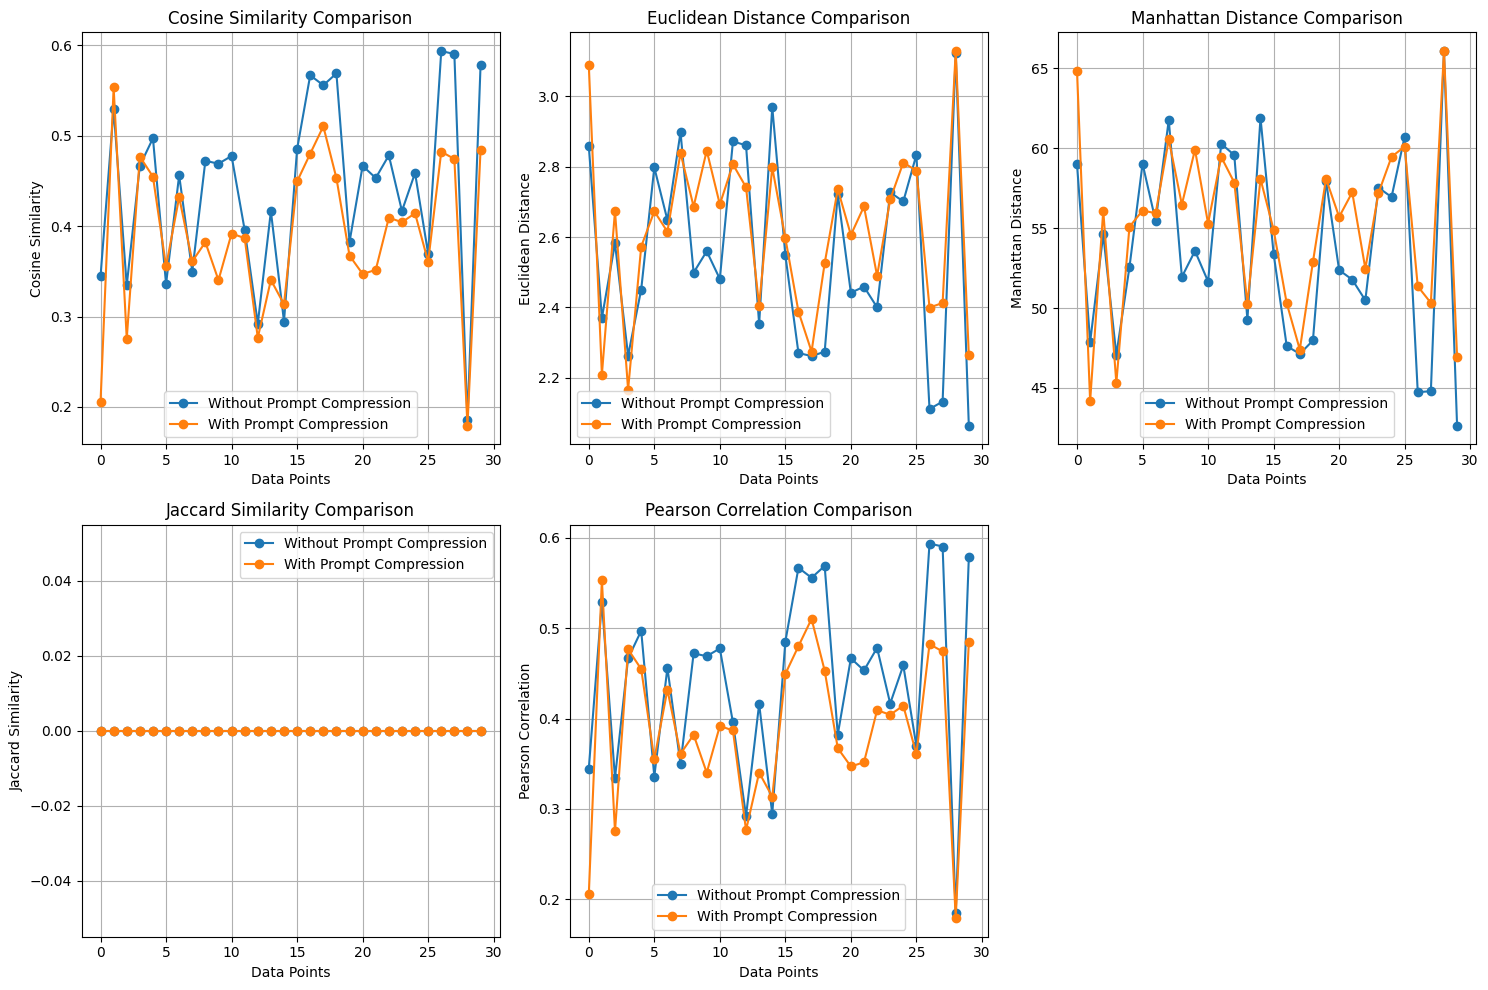

In [12]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from scipy.spatial.distance import euclidean, cityblock, jaccard
from scipy.stats import pearsonr
import numpy as np

# Assuming 'model' is already initialized, e.g., model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


# Lists to store metric results
cosine_similarities_wo_pc = []
cosine_similarities_w_pc = []
euclidean_distances_wo_pc = []
euclidean_distances_w_pc = []
manhattan_distances_wo_pc = []
manhattan_distances_w_pc = []
jaccard_similarities_wo_pc = []
jaccard_similarities_w_pc = []
pearson_correlations_wo_pc = []
pearson_correlations_w_pc = []

for i in range(30):
    sen1 = [wo_pc_data[i]['transcript'], summ[str(i)]['output']]
    sen2 = [pc_data[str(i)]['comp_prompt'][-5000:], summ[str(i)]['output']]
    
    enb_wo_pc = model.encode(sen1)
    enb_w_pc = model.encode(sen2)
    
    # Cosine similarity
    similarity_wo_pc = util.pytorch_cos_sim(*enb_wo_pc).item()
    similarity_w_pc = util.pytorch_cos_sim(*enb_w_pc).item()
    cosine_similarities_wo_pc.append(similarity_wo_pc)
    cosine_similarities_w_pc.append(similarity_w_pc)
    
    # Euclidean distance
    euclidean_dist_wo_pc = euclidean(enb_wo_pc[0], enb_wo_pc[1])
    euclidean_dist_w_pc = euclidean(enb_w_pc[0], enb_w_pc[1])
    euclidean_distances_wo_pc.append(euclidean_dist_wo_pc)
    euclidean_distances_w_pc.append(euclidean_dist_w_pc)
    
    # Manhattan distance
    manhattan_dist_wo_pc = cityblock(enb_wo_pc[0], enb_wo_pc[1])
    manhattan_dist_w_pc = cityblock(enb_w_pc[0], enb_w_pc[1])
    manhattan_distances_wo_pc.append(manhattan_dist_wo_pc)
    manhattan_distances_w_pc.append(manhattan_dist_w_pc)
    
    # Jaccard similarity
    jaccard_sim_wo_pc = 1 - jaccard(enb_wo_pc[0], enb_wo_pc[1])
    jaccard_sim_w_pc = 1 - jaccard(enb_w_pc[0], enb_w_pc[1])
    jaccard_similarities_wo_pc.append(jaccard_sim_wo_pc)
    jaccard_similarities_w_pc.append(jaccard_sim_w_pc)
    
    # Pearson correlation
    pearson_corr_wo_pc, _ = pearsonr(enb_wo_pc[0], enb_wo_pc[1])
    pearson_corr_w_pc, _ = pearsonr(enb_w_pc[0], enb_w_pc[1])
    pearson_correlations_wo_pc.append(pearson_corr_wo_pc)
    pearson_correlations_w_pc.append(pearson_corr_w_pc)

# Plotting the results
x_labels = [f"Data point {i}" for i in range(30)]
x = range(len(x_labels))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(x, cosine_similarities_wo_pc, label='Without Prompt Compression', marker='o')
plt.plot(x, cosine_similarities_w_pc, label='With Prompt Compression', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Comparison')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, euclidean_distances_wo_pc, label='Without Prompt Compression', marker='o')
plt.plot(x, euclidean_distances_w_pc, label='With Prompt Compression', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance Comparison')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, manhattan_distances_wo_pc, label='Without Prompt Compression', marker='o')
plt.plot(x, manhattan_distances_w_pc, label='With Prompt Compression', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Manhattan Distance')
plt.title('Manhattan Distance Comparison')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, jaccard_similarities_wo_pc, label='Without Prompt Compression', marker='o')
plt.plot(x, jaccard_similarities_w_pc, label='With Prompt Compression', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Jaccard Similarity')
plt.title('Jaccard Similarity Comparison')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, pearson_correlations_wo_pc, label='Without Prompt Compression', marker='o')
plt.plot(x, pearson_correlations_w_pc, label='With Prompt Compression', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Pearson Correlation')
plt.title('Pearson Correlation Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


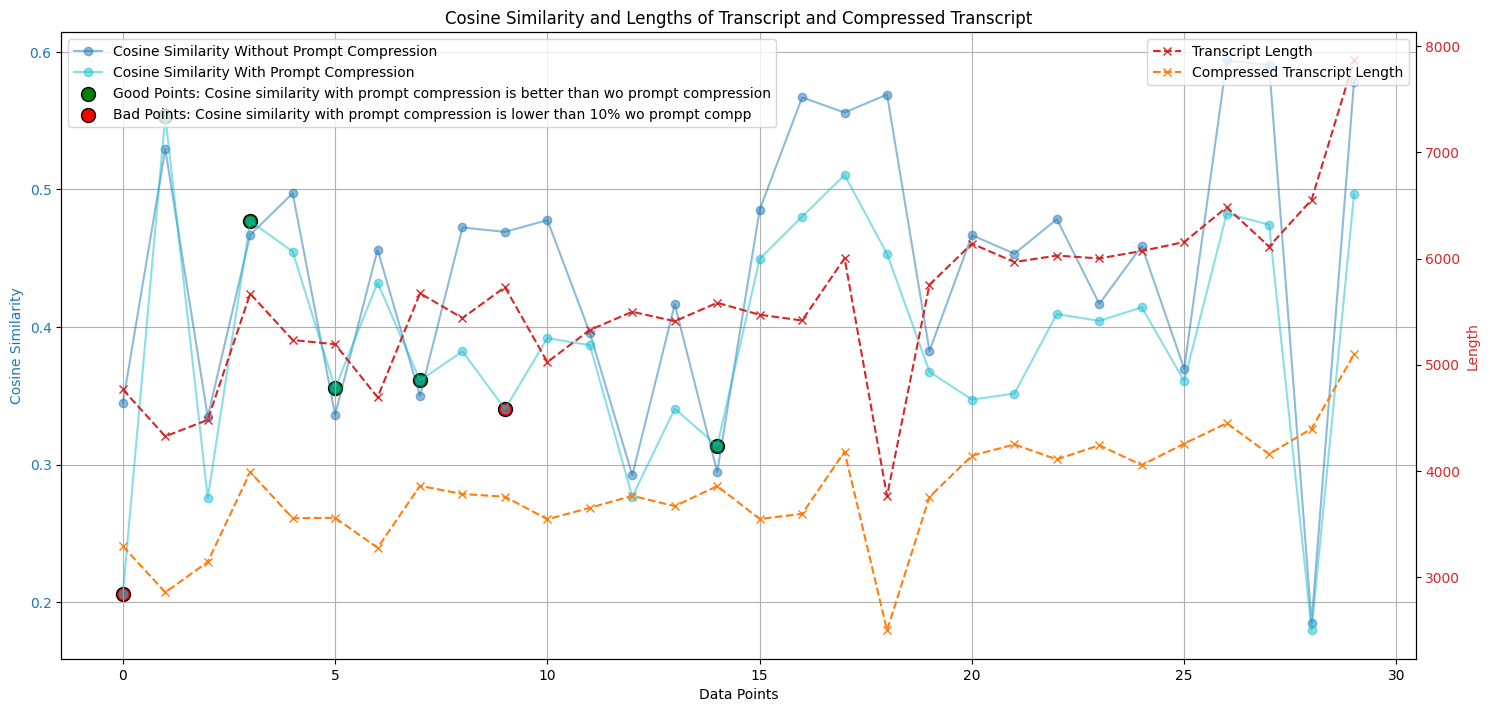

In [72]:
 #Lists to store metric results
cosine_similarities_wo_pc = []
cosine_similarities_w_pc = []
transcript_lengths = []
compressed_transcript_lengths = []

for i in range(30):
    sen1 = [wo_pc_data[i]['transcript'], summ[str(i)]['output']]
    sen2 = [pc_data[str(i)]['comp_prompt'], summ[str(i)]['output']]
    
    enb_wo_pc = model.encode(sen1)
    enb_w_pc = model.encode(sen2)
    
    # Cosine similarity
    similarity_wo_pc = util.pytorch_cos_sim(*enb_wo_pc).item()
    similarity_w_pc = util.pytorch_cos_sim(*enb_w_pc).item()
    
    cosine_similarities_wo_pc.append(similarity_wo_pc)
    cosine_similarities_w_pc.append(similarity_w_pc)
    
    # Lengths of transcript and compressed transcript
    transcript_length = len(wo_pc_data[i]['transcript'])
    compressed_transcript_length = len(pc_data[str(i)]['comp_prompt'])
    
    transcript_lengths.append(transcript_length)
    compressed_transcript_lengths.append(compressed_transcript_length)

# Define good and bad points
good_points = [i for i in range(30) if cosine_similarities_w_pc[i] > cosine_similarities_wo_pc[i]]
bad_points = [i for i in range(30) if (cosine_similarities_wo_pc[i] - cosine_similarities_w_pc[i]) > 0.12]

# Plotting the results
x_labels = [f"Data point {i}" for i in range(30)]
x = range(len(x_labels))

fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot cosine similarities
ax1.set_xlabel('Data Points')
ax1.set_ylabel('Cosine Similarity', color='tab:blue')
ax1.plot(x, cosine_similarities_wo_pc, label='Cosine Similarity Without Prompt Compression', color='tab:blue', marker='o', alpha=0.5)
ax1.plot(x, cosine_similarities_w_pc, label='Cosine Similarity With Prompt Compression', color='tab:cyan', marker='o', alpha=0.5)

# Highlight good points
ax1.scatter(good_points, [cosine_similarities_w_pc[i] for i in good_points], color='green', s=100, edgecolor='black', label='Good Points: Cosine similarity with prompt compression is better than wo prompt compression')

# Highlight bad points
ax1.scatter(bad_points, [cosine_similarities_w_pc[i] for i in bad_points], color='red', s=100, edgecolor='black', label='Bad Points: Cosine similarity with prompt compression is lower than 10% wo prompt compp')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot lengths of transcript and compressed transcript
ax2 = ax1.twinx()
ax2.set_ylabel('Length', color='tab:red')
ax2.plot(x, transcript_lengths, label='Transcript Length', color='tab:red', linestyle='dashed', marker='x')
ax2.plot(x, compressed_transcript_lengths, label='Compressed Transcript Length', color='tab:orange', linestyle='dashed', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Cosine Similarity and Lengths of Transcript and Compressed Transcript')
plt.savefig("analysis.jpg")